In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

Importing the Data Set

In [5]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5450958262541472138, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5450958262541472138, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5450958262541472138, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5450958262541472138, *['chol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5450958262541472138, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5450958262541472138, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5450958262541472138, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5450958262541472138, *['chol'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5450958262541472138 = autoviz.get_df('df_5450958262541472138')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5450958262541472138, *[[['age', 'sex'], ['sex', 'trestbps'], ['trestbps', 'chol'], ['chol', 'fbs']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data Preprocessing

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2920782298363724224, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2920782298363724224, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2920782298363724224, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2920782298363724224, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2920782298363724224, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2920782298363724224, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2920782298363724224, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2920782298363724224, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2920782298363724224 = autoviz.get_df('df_2920782298363724224')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2920782298363724224, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

In [7]:
df.shape

(1025, 14)

## Checking the NULL Values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3159751895082412011, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3159751895082412011, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3159751895082412011, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3159751895082412011, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3159751895082412011, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3159751895082412011, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3159751895082412011, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3159751895082412011, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3159751895082412011 = autoviz.get_df('df_3159751895082412011')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3159751895082412011, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

<Axes: >

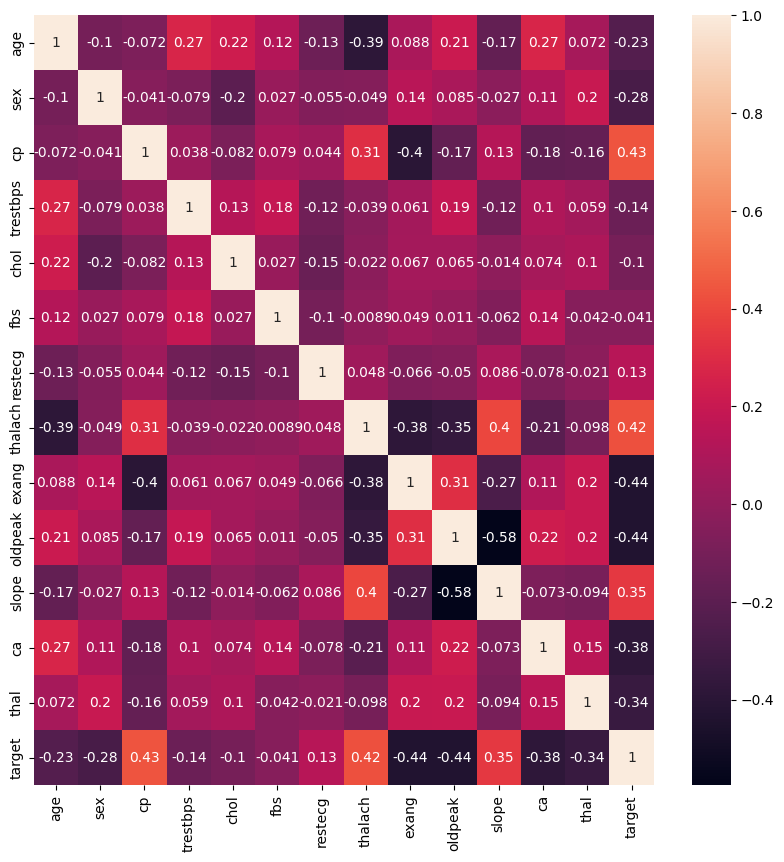

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)


In [11]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


No charts were generated by quickchart
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [12]:
df.isnull().sum().reset_index().rename(columns = ({'index':'Columns' , '0':'Total NULL Values'}))


,Columns,0
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,chol,0
5,fbs,0
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [13]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Here,

1 -> Person is having Defective Heart

0 -> Person is having healthy Heart

In [14]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2630208661377361589, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2630208661377361589, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2630208661377361589, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2630208661377361589, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2630208661377361589, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2630208661377361589, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2630208661377361589, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2630208661377361589, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2630208661377361589, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2630208661377361589, *['cp', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2630208661377361589, *['cp', 'sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2630208661377361589, *['cp', 'trestbps', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2630208661377361589 = autoviz.get_df('df_2630208661377361589')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2630208661377361589, *['cp', 'chol', None], **{})
chart

## Splitting the Data for training.

In [15]:
X = df.drop(columns = 'target' , axis = 1)
Y = df['target']

In [16]:
X.shape

(1025, 13)

In [17]:
Y.shape


(1025,)

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , stratify=Y, random_state = 2)


In [19]:
print('Training Data : ' , X_train.shape , Y_train.shape)
print('Testing Data : ' , X_test.shape , Y_test.shape)

Training Data :  (820, 13) (820,)
Testing Data :  (205, 13) (205,)


# Time to Train Our Model.
Here We will try to train our model using all possible

1.   Here We will try to train our model using all possible algorithms that comes under classificatino category and will try to figure it out that which algorithm gives us the best accuracy.
2.   Then after we will save that best trained model for deployment process.




## 1. Logistic Regression Algorithm.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(penalty='l2',       # L2 regularization (default)
    C=1.0,              # Regularization strength (default)
    solver='lbfgs',     # Optimization algorithm (default)
    max_iter=100,       # Maximum number of iterations (default)
    multi_class='auto', # Auto choose one-vs-rest or multinomial (default)
    class_weight=None,  # No class weights (default)
    random_state=42,    # Random seed for reproducibility
    fit_intercept=True, # Calculate the intercept (default)
    intercept_scaling=1 # No scaling of the intercept (default))
)

In [22]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(Y_test, y_pred)



In [25]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy : 80.48780487804879
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



So here by using LogisticRegression Algorithm we got around 82% Accuracy.

# 2. Decision Tree Algorithm


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
classifier = DecisionTreeClassifier(
    criterion='gini',          # Gini impurity (default)
    splitter='best',           # Choose the best split (default)
    max_depth=None,            # No maximum depth (default)
    min_samples_split=2,       # Minimum samples to split (default)
    min_samples_leaf=1,        # Minimum samples in a leaf (default)
    max_features=None,         # Consider all features (default)
    class_weight=None,         # No class weights (default)
    random_state=42            # Random seed for reproducibility)
)

In [28]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [31]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Here , DecisionTreeClassifier Algorithm Trains well with our dataset and gives Around 78.68% Accuracy.

## 3. Random Forest Classifier Algorithm


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
Random_forest_model = RandomForestClassifier(
    n_estimators=400,          # Number of trees in the forest
    criterion='gini',          # Gini impurity (default)
    max_depth=5,            # No maximum depth (default)
    min_samples_split=2,       # Minimum samples to split (default)
    min_samples_leaf=1,        # Minimum samples in a leaf (default)
    max_features='auto',       # Auto choose features to consider
    class_weight=None,         # No class weights (default)
    random_state=42            # Random seed for reproducibility
)

In [34]:
Random_forest_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=400,
                       random_state=42)

In [35]:
y_pred = Random_forest_model.predict(X_test)

In [36]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [37]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 91.70731707317074
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.92      0.92      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



Here , RandomForestClassifier Algorithm Trains well with our dataset and gives Around 80% Accuracy.

## Support Vector Machine(SVM) Algorithm


In [38]:
from sklearn.svm import SVC


In [39]:
SVM_model = SVC(
    kernel='rbf',            # Radial Basis Function (RBF) kernel (default)
    C=1.0,                   # Regularization parameter (default)
    gamma='scale',           # Kernel coefficient (default)
    class_weight=None,       # No class weights (default)
    random_state=42          # Random seed for reproducibility
)

In [40]:
SVM_model.fit(X_train, Y_train)

SVC(random_state=42)

In [41]:
y_pred = SVM_model.predict(X_test)



In [42]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [43]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 70.73170731707317
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       100
           1       0.69      0.78      0.73       105

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.70       205
weighted avg       0.71      0.71      0.71       205



So here by using Support Vector Machine Algorithm we got around 62.3% Accuracy.

## Naive Bayes Algorithm

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
custom_priors = [0.7, 0.3]  # Let's assume class 0 has a prior probability of 0.7, and class 1 has a prior probability of 0.3

In [46]:
Guassian_model = GaussianNB(priors=custom_priors)

In [47]:
Guassian_model.fit(X_train, Y_train)

GaussianNB(priors=[0.7, 0.3])

In [48]:
y_pred = Guassian_model.predict(X_test)

In [49]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [50]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 78.53658536585367
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.81      0.75      0.78       105

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



So here by using Logistic Regression Algorithm we got around 82% Accuracy which is a bit similar to Naive Bayes Algorithm.

**Conclusion :** Logistic Regression Algorithm Trains well with our provided data. So here we are going to use Logistic Regression Algorithm as it is giving us around 82% Accuracy.



## Time to Save Our Decision Tree Model.

In [51]:
import pickle

In [52]:
with open('Heart_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)